# Objective
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months.

# Context
- Banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider.
- It is important to understand which aspects of the service influence a customer's decision in this regard.

## 1. Import Libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
bankData = pd.read_csv("bank.csv")

## 2. Shape of the dataset

In [3]:
bankData.shape

(10000, 14)

In [4]:
bankData.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* No null values in data set

In [5]:
bankData.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## 3. Univariate analysis

### 3.1 Dropping unique columns

In [6]:
bankData_reduced = bankData.drop({'RowNumber', 'CustomerId', 'Surname'}, axis=1)

bankData_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
bankData_reduced2 = bankData_reduced[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Exited"]]

In [8]:
bankData_reduced2.drop({'Exited'}, axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


### 3.2 Find duplicated rows

In [9]:
bankData_reduced[bankData_reduced.duplicated(keep=False)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


- There are 0 duplicated rows

### 3.3 Change data types

In [10]:
# Convert "Gender" and "Geography" field into categorical fields
bankData_reduced = bankData_reduced.astype({"Gender":'category', "Geography":'category'})
# Convert categorical fields into binary fields
bankData_reduced = pd.get_dummies(bankData_reduced)
# Convert all fields into the same data type - float
bankData_reduced = bankData_reduced.astype('float32')

bankData_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
CreditScore          10000 non-null float32
Age                  10000 non-null float32
Tenure               10000 non-null float32
Balance              10000 non-null float32
NumOfProducts        10000 non-null float32
HasCrCard            10000 non-null float32
IsActiveMember       10000 non-null float32
EstimatedSalary      10000 non-null float32
Exited               10000 non-null float32
Geography_France     10000 non-null float32
Geography_Germany    10000 non-null float32
Geography_Spain      10000 non-null float32
Gender_Female        10000 non-null float32
Gender_Male          10000 non-null float32
dtypes: float32(14)
memory usage: 547.0 KB


In [11]:
# Drop 'Gender_Male' column as it's fully correlated with 'Gender_Female' column

bankData_reduced.drop({'Gender_Male'}, axis=1, inplace=True)

### 3.4 Check "Exited" column

In [12]:
bankData_reduced["Exited"].value_counts()

0.0    7963
1.0    2037
Name: Exited, dtype: int64

* Dataset is heavily imbalanced, with only 20% of exited rows

## 4. Bi-variate analysis

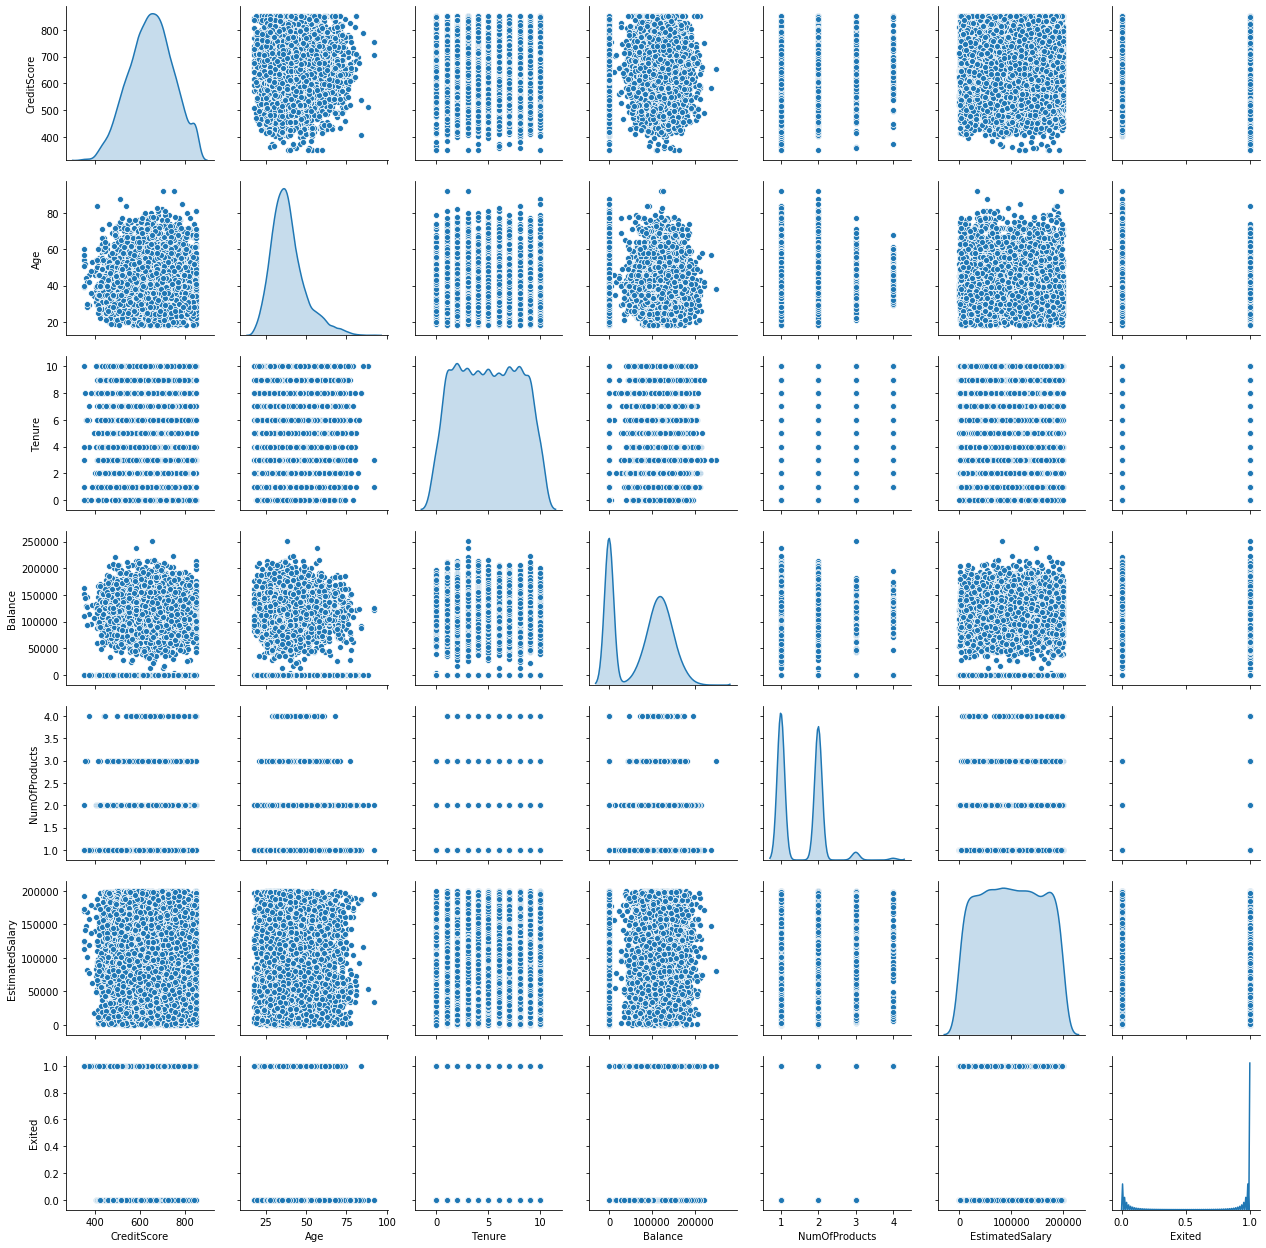

In [13]:
sns.pairplot(bankData_reduced2, diag_kind='kde')
plt.show()

In [14]:
bankData_reduced2.corr().mask(abs(bankData_reduced2.corr()) <= 0.7, np.nan)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
CreditScore,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Tenure,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Balance,NaN,NaN,NaN,1.0,NaN,NaN,NaN
NumOfProducts,NaN,NaN,NaN,NaN,1.0,NaN,NaN
EstimatedSalary,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Exited,NaN,NaN,NaN,NaN,NaN,NaN,1.0


* All numeric columns have very weak correlation between each other and with target "Exited" column

## 5. Divide the data set into training and test sets

In [15]:
from sklearn.model_selection import train_test_split

X = bankData_reduced.drop('Exited', axis=1)
y = bankData_reduced['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## 6. Normalize data

In [16]:
columns = X_train.columns

from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(X_train)
X_train_norm = pd.DataFrame(normalizer.transform(X_train), columns=columns)
X_test_norm = pd.DataFrame(normalizer.transform(X_test), columns=columns)

In [17]:
X_train_norm.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female
0,0.003729,0.000172,0.000018,0.671818,0.000012,0.000000,0.000006,0.740707,0.000000,0.000006,0.000000,0.000000
1,0.005517,0.000256,0.000035,0.932070,0.000018,0.000000,0.000000,0.362235,0.000009,0.000000,0.000000,0.000009
2,0.004440,0.000341,0.000044,0.943301,0.000007,0.000007,0.000007,0.331908,0.000000,0.000007,0.000000,0.000007
3,0.004931,0.000397,0.000046,0.852993,0.000015,0.000000,0.000008,0.521899,0.000000,0.000008,0.000000,0.000008
4,0.003513,0.000162,0.000039,0.600408,0.000005,0.000000,0.000000,0.799686,0.000000,0.000000,0.000005,0.000000


In [18]:
X_test_norm.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female
0,0.005667,0.000484,0.000021,0.000000,0.000021,0.000010,0.000010,0.999984,0.000010,0.000000,0.0,0.000000
1,0.004304,0.000215,0.000019,0.907007,0.000006,0.000006,0.000000,0.421092,0.000006,0.000000,0.0,0.000000
2,0.005865,0.000464,0.000022,0.000000,0.000022,0.000000,0.000011,0.999983,0.000011,0.000000,0.0,0.000011
3,0.004802,0.000230,0.000054,0.999933,0.000014,0.000000,0.000007,0.010562,0.000000,0.000007,0.0,0.000000
4,0.002838,0.000157,0.000031,0.383986,0.000005,0.000005,0.000005,0.923334,0.000000,0.000005,0.0,0.000000


## 7. Build and evaluate the model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
import tensorflow as tf

# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model = Sequential()

model.add(Dense(64, input_shape=(12,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train_norm, y_train, validation_split=0.20, epochs=500, batch_size=800, verbose=0)

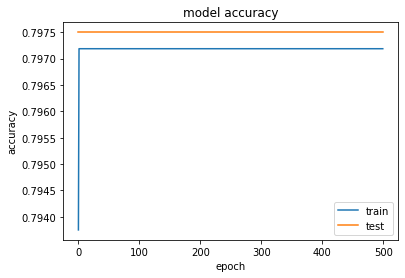

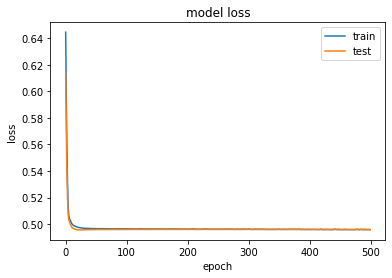

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [22]:
model.evaluate(X_train_norm, y_train.values)

8000/8000 [==============================] - 0s 26us/sample - loss: 0.4957 - accuracy: 0.7972


[0.4957377165555954, 0.79725]

In [23]:
result = model.evaluate(X_test_norm, y_test.values)

2000/2000 [==============================] - 0s 25us/sample - loss: 0.5036 - accuracy: 0.7925


In [24]:
print(model.metrics_names)
print(result)

['loss', 'accuracy']
[0.503550311088562, 0.7925]


In [25]:
# Print Accuracy, Recall, Precision, F1 Score and Confusion Matrix

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

Y_pred_cls = model.predict_classes(X_test_norm, batch_size=200, verbose=0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values, Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.7925
Recall score: 0.0
Precision score: 0.0
F1-score: 0.0


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1585,    0],
       [ 415,    0]], dtype=int64)

In [26]:
resultsDf = pd.DataFrame({'Method':['Normalize + NN'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.0,0.0


## 8. Scale data

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=columns)

In [28]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,8000.0,0.600629,0.193354,0.0,0.466000,0.602000,0.736000,1.0
Age,8000.0,0.282260,0.141473,0.0,0.189189,0.256757,0.351351,1.0
Tenure,8000.0,0.502499,0.288584,0.0,0.300000,0.500000,0.700000,1.0
Balance,8000.0,0.304759,0.248593,0.0,0.000000,0.386831,0.508730,1.0
NumOfProducts,8000.0,0.177294,0.194518,0.0,0.000000,0.000000,0.333333,1.0
HasCrCard,8000.0,0.707000,0.455169,0.0,0.000000,1.000000,1.000000,1.0
IsActiveMember,8000.0,0.511500,0.499900,0.0,0.000000,1.000000,1.000000,1.0
EstimatedSalary,8000.0,0.500561,0.288049,0.0,0.254770,0.499024,0.746861,1.0
Geography_France,8000.0,0.499250,0.500030,0.0,0.000000,0.000000,1.000000,1.0
Geography_Germany,8000.0,0.253750,0.435168,0.0,0.000000,0.000000,1.000000,1.0


In [29]:
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,2000.0,0.602778,0.193156,0.000000,0.472000,0.608000,0.734000,1.000000
Age,2000.0,0.284594,0.142765,0.000000,0.189189,0.270270,0.351351,0.945946
Tenure,2000.0,0.496400,0.291754,0.000000,0.200000,0.500000,0.800000,1.000000
Balance,2000.0,0.305206,0.249153,0.000000,0.000000,0.388086,0.508827,0.882959
NumOfProducts,2000.0,0.174501,0.191372,0.000000,0.000000,0.000000,0.333333,1.000000
HasCrCard,2000.0,0.699500,0.458590,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,2000.0,0.529500,0.499254,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,2000.0,0.499231,0.286504,-0.000401,0.254476,0.505884,0.746995,1.000109
Geography_France,2000.0,0.510000,0.500028,0.000000,0.000000,1.000000,1.000000,1.000000
Geography_Germany,2000.0,0.239500,0.426887,0.000000,0.000000,0.000000,0.000000,1.000000


## 9. Build and evaluate new model

In [30]:
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model2 = Sequential()

model2.add(Dense(64, input_shape=(12,), activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train_scaled, y_train, validation_split=0.20, epochs=1000, batch_size=800, verbose=0)

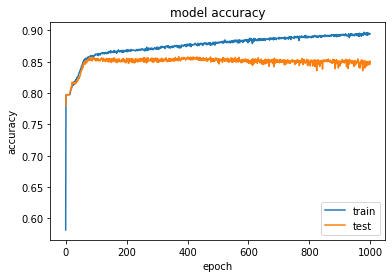

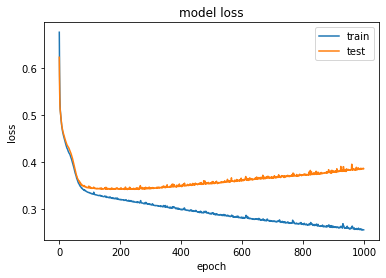

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [32]:
values = history.history['val_accuracy']
maxEpoch = values.index(max(values))
print("Epoch: " + str(maxEpoch) + ", max validation accuracy: " + str(values[maxEpoch]))

Epoch: 371, max validation accuracy: 0.858125


In [33]:
# According to the plots, model tends to overfit after epoch=maxEpoch
# Thus re-trained with epoch=maxEpoch to get best test accuracy

# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model3 = Sequential()

model3.add(Dense(64, input_shape=(12,), activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model3.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(X_train_scaled, y_train, validation_split=0.20, epochs=maxEpoch, batch_size=800, verbose=0)

In [34]:
model3.evaluate(X_train_scaled, y_train.values)

8000/8000 [==============================] - 0s 26us/sample - loss: 0.3111 - accuracy: 0.8710


[0.3110753882527351, 0.871]

In [35]:
result3 = model3.evaluate(X_test_scaled, y_test.values)

2000/2000 [==============================] - 0s 26us/sample - loss: 0.3458 - accuracy: 0.8670


In [36]:
print(model3.metrics_names)
print(result3)

['loss', 'accuracy']
[0.34582934856414793, 0.867]


In [37]:
Y_pred_cls = model3.predict_classes(X_test_scaled, batch_size=200, verbose=0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values, Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.867
Recall score: 0.4939759036144578
Precision score: 0.7854406130268199
F1-score: 0.606508875739645


array([[1529,   56],
       [ 210,  205]], dtype=int64)

In [38]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + NN'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.000000,0.000000
0,Scale + NN,0.8670,0.493976,0.606509


## 10. PCA scaled data

In [39]:
from sklearn.decomposition import PCA

n_PCA_components = 12
pca = PCA(n_components=n_PCA_components)
pca.fit(X_train_scaled)

columns = ['pca_%i' % i for i in range(n_PCA_components)]
X_train_scaled_pca = pd.DataFrame(pca.transform(X_train_scaled), columns=columns, index=X_train_scaled.index)
X_test_scaled_pca = pd.DataFrame(pca.transform(X_test_scaled), columns=columns, index=X_test_scaled.index)
X_train_scaled_pca.shape

(8000, 12)

In [40]:
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model4 = Sequential()

model4.add(Dense(64, input_shape=(12,), activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model4.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model4.fit(X_train_scaled_pca, y_train, validation_split=0.20, epochs=1000, batch_size=800, verbose=0)

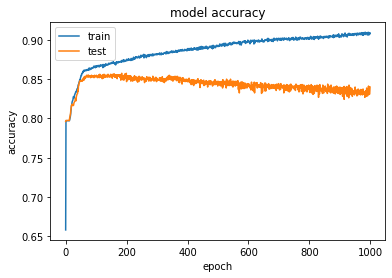

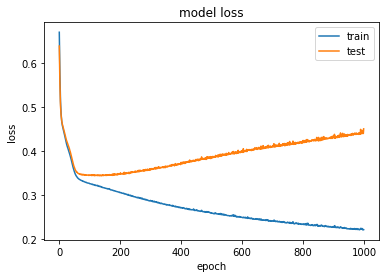

In [41]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [42]:
values = history.history['val_accuracy']
maxEpoch = values.index(max(values))
print("Epoch: " + str(maxEpoch) + ", max validation accuracy: " + str(values[maxEpoch]))

Epoch: 184, max validation accuracy: 0.8575


In [43]:
# According to the plots, model tends to overfit after epoch=maxEpoch
# Thus re-trained with epoch=maxEpoch to get best test accuracy

# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model5 = Sequential()

model5.add(Dense(64, input_shape=(12,), activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model5.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model5.fit(X_train_scaled_pca, y_train, validation_split=0.20, epochs=maxEpoch, batch_size=800, verbose=0)

In [44]:
Y_pred_cls = model5.predict_classes(X_test_scaled_pca, batch_size=200, verbose=0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values, Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.86
Recall score: 0.4867469879518072
Precision score: 0.7509293680297398
F1-score: 0.5906432748538012


array([[1518,   67],
       [ 213,  202]], dtype=int64)

In [45]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + PCA + NN'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.000000,0.000000
0,Scale + NN,0.8670,0.493976,0.606509
0,Scale + PCA + NN,0.8600,0.486747,0.590643


## 11. Set class_weight for imbalanced class Exited=0

In [46]:
class_weight = {0: 1., 1: 4.}

# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model6 = Sequential()

model6.add(Dense(64, input_shape=(12,), activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model6.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model6.fit(X_train_scaled, y_train, validation_split=0.20, epochs=1000, batch_size=800, verbose=0, class_weight=class_weight)

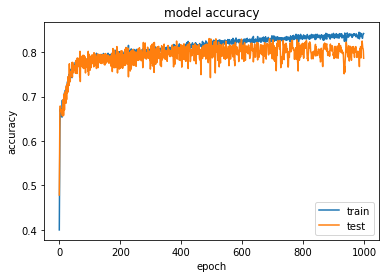

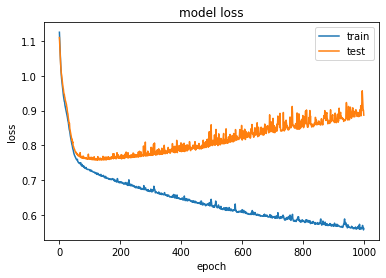

In [47]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [48]:
values = history.history['val_accuracy']
maxEpoch = values.index(max(values))
print("Epoch: " + str(maxEpoch) + ", max validation accuracy: " + str(values[maxEpoch]))

Epoch: 492, max validation accuracy: 0.830625


In [49]:
# According to the plots, model tends to overfit after epoch=maxEpoch
# Thus re-trained with epoch=maxEpoch to get best test accuracy

# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model7 = Sequential()

model7.add(Dense(64, input_shape=(12,), activation='relu'))
model7.add(Dense(32, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.001)
#sgd = optimizers.SGD()

model7.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model7.fit(X_train_scaled, y_train, validation_split=0.20, epochs=maxEpoch, batch_size=800, verbose=0)

In [50]:
values = history.history['val_accuracy']
maxEpoch = values.index(max(values))
print("Epoch: " + str(maxEpoch) + ", max validation accuracy: " + str(values[maxEpoch]))

Epoch: 492, max validation accuracy: 0.830625


In [51]:
Y_pred_cls = model7.predict_classes(X_test_scaled, batch_size=200, verbose=0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values, Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.8635
Recall score: 0.4674698795180723
Precision score: 0.7886178861788617
F1-score: 0.5869894099848714


array([[1533,   52],
       [ 221,  194]], dtype=int64)

In [52]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + class_weight + NN'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.000000,0.000000
0,Scale + NN,0.8670,0.493976,0.606509
0,Scale + PCA + NN,0.8600,0.486747,0.590643
0,Scale + class_weight + NN,0.8635,0.467470,0.586989


## 12. Oversampling data by SMOTE

In [53]:
from imblearn.over_sampling import SMOTE #pip install -U imbalanced-learn --user

# It's important to apply SMOTE only on train data to not introduce any data leak
sm = SMOTE(random_state = 1)
X_train_scaled_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_scaled, y_train)

In [54]:
X_train_scaled_SMOTE.shape

(12756, 12)

In [55]:
y_train_SMOTE.value_counts()

1.0    6378
0.0    6378
Name: Exited, dtype: int64

In [56]:
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model8 = Sequential()

model8.add(Dense(64, input_shape=(12,), activation='relu'))
model8.add(Dense(32, activation='relu'))
model8.add(Dense(16, activation='relu'))
model8.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(lr=0.0001)
#sgd = optimizers.SGD()

model8.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model8.fit(X_train_scaled_SMOTE, y_train_SMOTE, validation_split=0.20, epochs=5000, batch_size=1000, verbose=0)

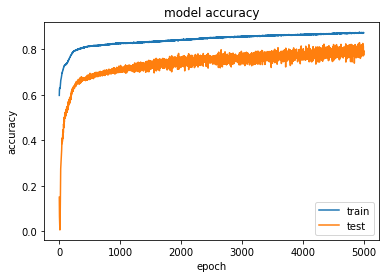

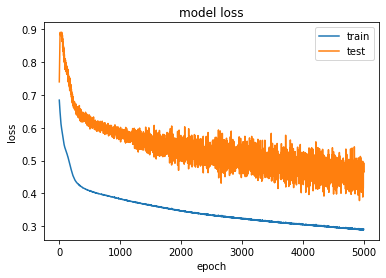

In [57]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [58]:
Y_pred_cls = model8.predict_classes(X_test_scaled, batch_size=200, verbose=0)
accuracy = accuracy_score(y_test.values, Y_pred_cls)
recall = recall_score(y_test.values, Y_pred_cls)
precision = precision_score(y_test.values, Y_pred_cls)
f1 = f1_score(y_test.values,Y_pred_cls)

print('Accuracy score: '+ str(accuracy))
print('Recall score: ' + str(recall))
print('Precision score: ' + str(precision))
print('F1-score: ' + str(f1))

confusion_matrix(y_test.values, Y_pred_cls)

Accuracy score: 0.823
Recall score: 0.5855421686746988
Precision score: 0.571764705882353
F1-score: 0.5785714285714285


array([[1403,  182],
       [ 172,  243]], dtype=int64)

In [59]:
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Scale + SMOTE + NN'], 
                          'Accuracy': [accuracy],
                          'Recall': [recall],
                          'F1': [f1]})])
resultsDf

,Method,Accuracy,Recall,F1
0,Normalize + NN,0.7925,0.000000,0.000000
0,Scale + NN,0.8670,0.493976,0.606509
0,Scale + PCA + NN,0.8600,0.486747,0.590643
0,Scale + class_weight + NN,0.8635,0.467470,0.586989
0,Scale + SMOTE + NN,0.8230,0.585542,0.578571


## 13. Summary

* "Scale + NN" and "Scale + PCA + NN" model have the highest accuracy of 86.7% and 86%
* "Scale + SMOTE + NN" and "Scale + NN" model have the highest recall of 58.6% and 49.4%
* We need a model which can predict exited customers correctly, thus it should also have high recall and F-score
* For this reason, "Scale + NN" model should be considered